In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
zoo = pd.read_csv('Zoo.csv')

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## EXPLORATORY DATA ANALYSIS

In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [11]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

## VISUALIZATION

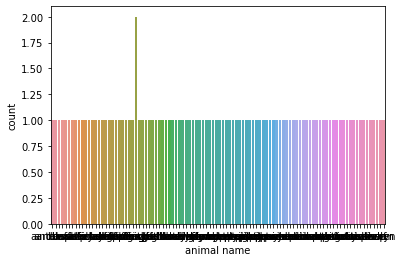

In [13]:
# get the distribution of the target variable
sns.countplot(x="animal name", data = zoo)

In [42]:
color_list = [("Blue" if i ==1 else "Red" if i ==0 else "yellow" ) for i in zoo.hair]

In [43]:
# With this set function we find unique values in a list...
unique_list = list(set(color_list))
unique_list

['Red', 'Blue']

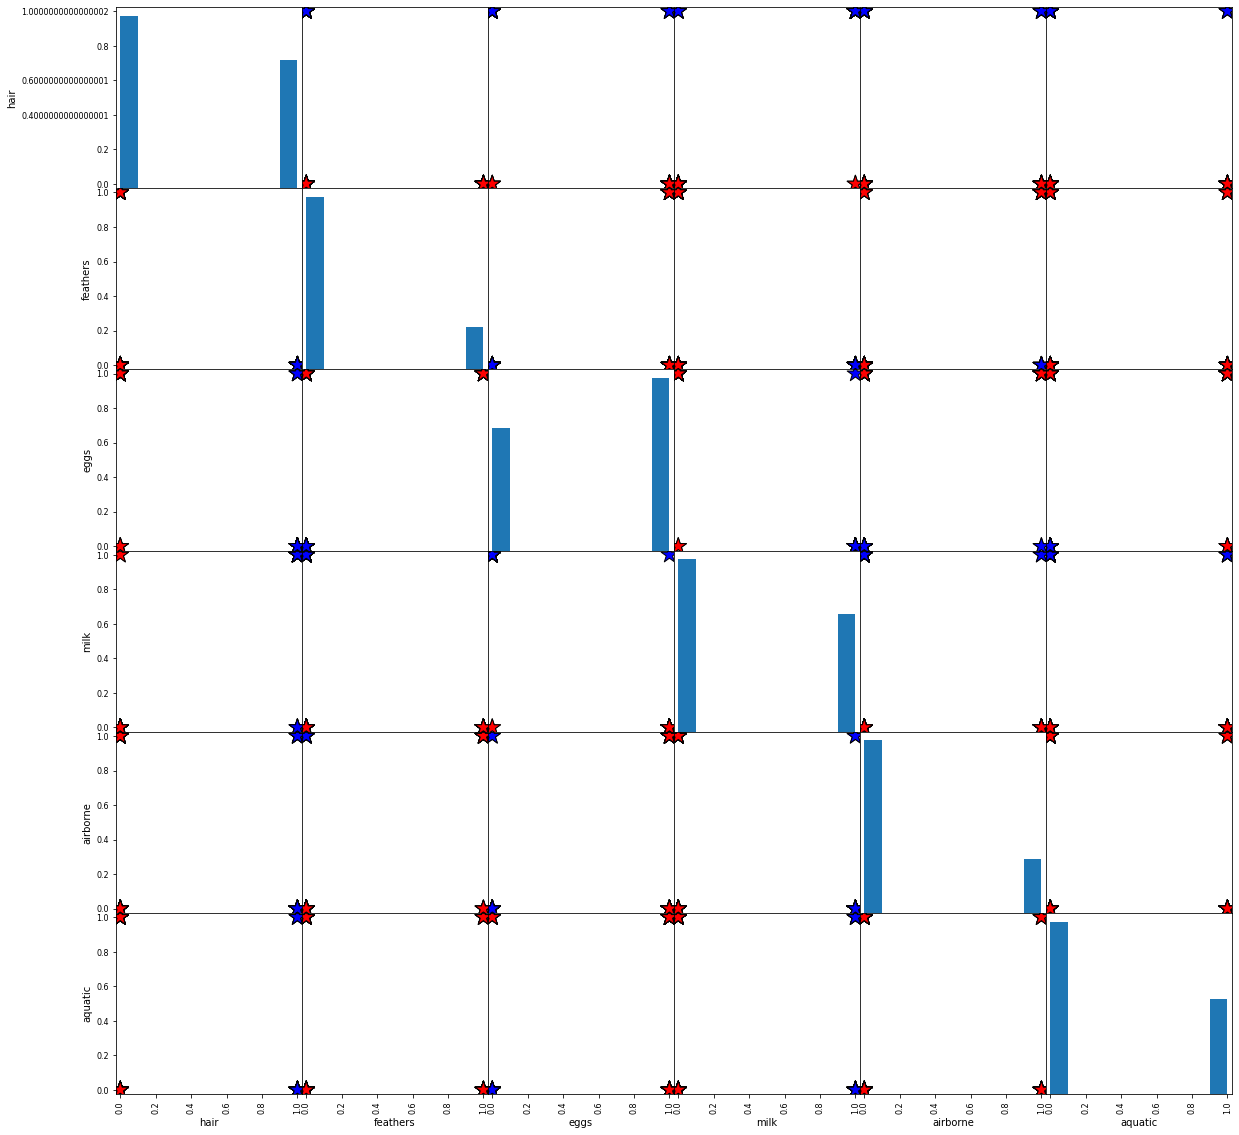

In [44]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

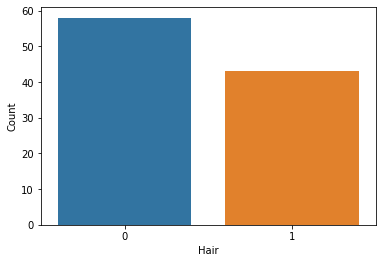

0    58
1    43
Name: hair, dtype: int64

In [45]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

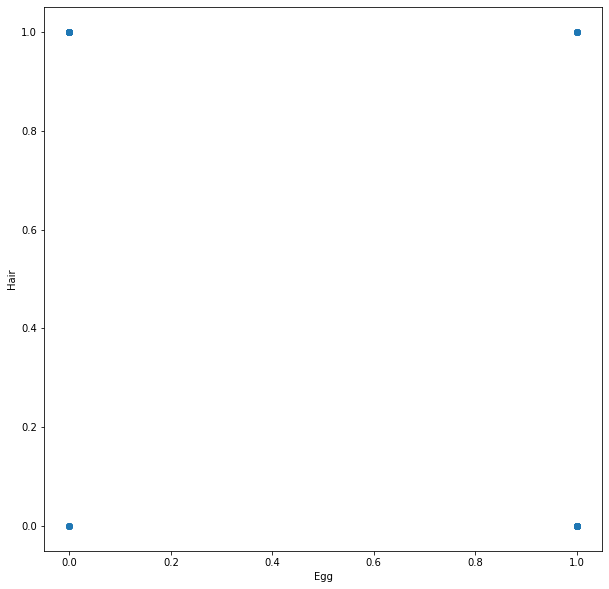

In [46]:
x = np.array(zoo.loc[:,"eggs"]).reshape(-1,1)
y = np.array(zoo.loc[:,'hair']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('Egg')
plt.ylabel('Hair')
plt.show()

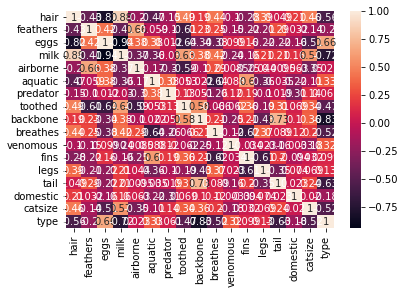

In [16]:
corr = zoo.corr()
corr
sns.heatmap(corr,annot=True)

## MODEL BUILDING

In [29]:
zoo = zoo.rename({'animal name':'animal'},axis = 1)

In [34]:
y=zoo['type'].values
X=zoo.drop(['type','animal'],axis=1).values

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNC(n_neighbors=7)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [36]:
knn.score(X_train,y_train)

0.8857142857142857

In [37]:
knn.score(X_test,y_test)

0.8064516129032258

In [38]:
preds=knn.predict(X_test)

In [39]:
preds

array([1, 1, 4, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 4, 1, 1, 2, 4, 1, 4, 3,
       1, 6, 1, 7, 6, 6, 1, 1, 2])

In [40]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      0.40      0.57         5
           5       0.00      0.00      0.00         0
           6       1.00      0.83      0.91         6
           7       0.33      1.00      0.50         1

    accuracy                           0.81        31
   macro avg       0.61      0.60      0.56        31
weighted avg       0.91      0.81      0.83        31



## HYPERPARAMETER TUNNING

In [41]:
# getting optimum "k" value
a= []
for i in range (1,10,2):
    knn = KNC(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_acc = np.mean(knn.predict(X_train)==y_train)
    test_acc = np.mean(knn.predict(X_test)==y_test)
    a.append([train_acc,test_acc])

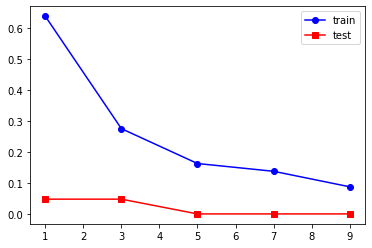

In [27]:
plt.plot(np.arange(1,10,2),[i[0] for i in a],"bo-")
plt.plot(np.arange(1,10,2), [i[1] for i in a], "rs-")
plt.legend(["train","test"])

## RIDGE AND LASSO

In [48]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha= 0.001,normalize = True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
print("Ridge Score: ",ridge.score(X_test,y_test))

Ridge Score:  0.9302397279928529


In [49]:
from sklearn.linear_model import Lasso
x = np.array(zoo.loc[:,['eggs','airborne','fins','legs',"hair","type"]])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)


Lasso score:  0.9999970989932222
Lasso coefficients:  [-0.         -0.         -0.          0.          0.99830154 -0.        ]
